In [1]:
# Summary
# Business understaning
# Data Understanding
# Data Exploration
# Data Preprocesing
# EDA
# Modeling
# Evaluation
# conclusion
# Reccomendation

### Data Exploration and Preprocessing

In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# df = pd.read_csv('/content/judge-1377884607_tweet_product_company.csv', encoding='latin-1')

In [4]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='latin-1')

In [5]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [6]:
# renaming the columns for easier workflow
df.rename(columns={'tweet_text': 'tweet', 'emotion_in_tweet_is_directed_at': 'product', 'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment', }, inplace=True)
df.head()

,tweet,product,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [8]:
# removing the row from sentiment column where a tweet is missing
df = df.dropna(subset=['tweet'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [9]:
df['product'].isna().sum()

5801

In [10]:
df['product'].fillna('Missing')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9092 non-null   object
 1   product    3291 non-null   object
 2   sentiment  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [11]:
df['sentiment'].value_counts()

,count
sentiment,
No emotion toward brand or product,5388
Positive emotion,2978
Negative emotion,570
I can't tell,156


In [12]:
# renaming sentiment labels
df['sentiment'] = df['sentiment'].replace({'No emotion toward brand or product': 'neutral',
                                           'Positive emotion': 'positive',
                                           'Negative emotion': 'negative',
                                           'I can\'t tell': 'can\'t tell'})

# filtering out the can't tell sentiments
df = df[df['sentiment'] != "can't tell"]

df['sentiment'].value_counts()

,count
sentiment,
neutral,5388
positive,2978
negative,570


In [13]:
def clean_text(text):
    # checking if text is a string before applying regex
    if isinstance(text, str):
        # removing mentions (@username)
        text = re.sub(r'@\w+', '', text)

        # removing URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text)

        # removing hashtags
        text = re.sub(r'#\w+', '', text)

        # removing extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()

        # removing emojis
        text = re.sub(r'[^\x00-\x7F]+', '', text)

        # removing special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # removing punctuation
        text = re.sub(r'[^\w\s]', '', text)

        # converting to lowercase
        text = text.lower()
    return text

# applying cleaning to the dataset
df['cleaned_text'] = df['tweet'].apply(clean_text)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8936 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet         8936 non-null   object
 1   product       3282 non-null   object
 2   sentiment     8936 non-null   object
 3   cleaned_text  8936 non-null   object
dtypes: object(4)
memory usage: 349.1+ KB


In [15]:
df.head()

,tweet,product,sentiment,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,i have a g iphone after hrs tweeting at it ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,know about awesome ipadiphone app that youll ...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,can not wait for also they should sale them d...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,i hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,great stuff on fri marissa mayer google tim o...


In [16]:
# initializing stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lem = WordNetLemmatizer()

# function to do tokenization, stopword removal, and lemmatization
def process_text(text):
    if isinstance(text, str):
        # tokenizing the text
        tokens = word_tokenize(text)

        # removing stopwords
        filtered_tokens = []
        for token in tokens:
          if token not in stop_words:
            filtered_tokens.append(token)

        # lemmatization
        lem_tokens = []
        for token in filtered_tokens:
          lem_tokens.append(lem.lemmatize(token))

        # joining tokens back to a single string
        return ' '.join(lem_tokens)
    return text

# applying the function to the cleaned text
df['processed_text'] = df['cleaned_text'].apply(process_text)

In [17]:
df.head()

,tweet,product,sentiment,cleaned_text,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative,i have a g iphone after hrs tweeting at it ...,g iphone hr tweeting dead need upgrade plugin ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive,know about awesome ipadiphone app that youll ...,know awesome ipadiphone app youll likely appre...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive,can not wait for also they should sale them d...,wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative,i hope this years festival isnt as crashy as t...,hope year festival isnt crashy year iphone app
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive,great stuff on fri marissa mayer google tim o...,great stuff fri marissa mayer google tim oreil...


In [18]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the processed_text column
X = tfidf.fit_transform(df['processed_text'])

# Convert the resulting sparse matrix to a DataFrame for easier inspection
X_tfidf = pd.DataFrame(X.toarray(), columns=tfidf.get_feature_names_out())

print(X_tfidf.head())  # Displays the first few rows of the TF-IDF features


   aapl  aaron   ab  abba  abc  ability  able  abnormal  absolutely  \
0   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   
1   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   
2   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   
3   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   
4   0.0    0.0  0.0   0.0  0.0      0.0   0.0       0.0         0.0   

   absolutley  ...  zip  zite  zlf  zms  zombie  zomg  zone  zoom  zuckerberg  \
0         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   
1         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   
2         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   
3         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   
4         0.0  ...  0.0   0.0  0.0  0.0     0.0   0.0   0.0   0.0         0.0   

   zynga  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows x 5000 colu

### EDA

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

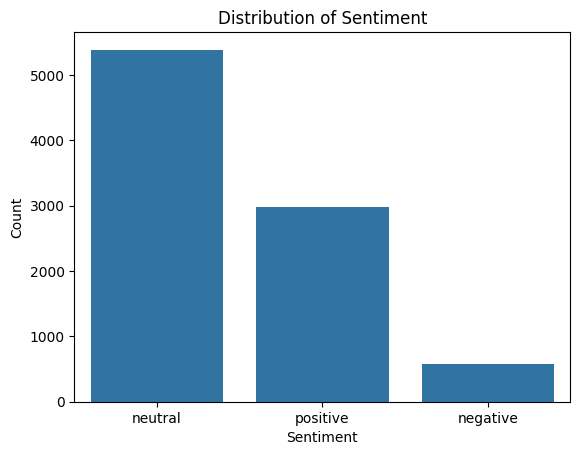

In [20]:
# visualizing the count of sentiments
sentiment_counts = df['sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

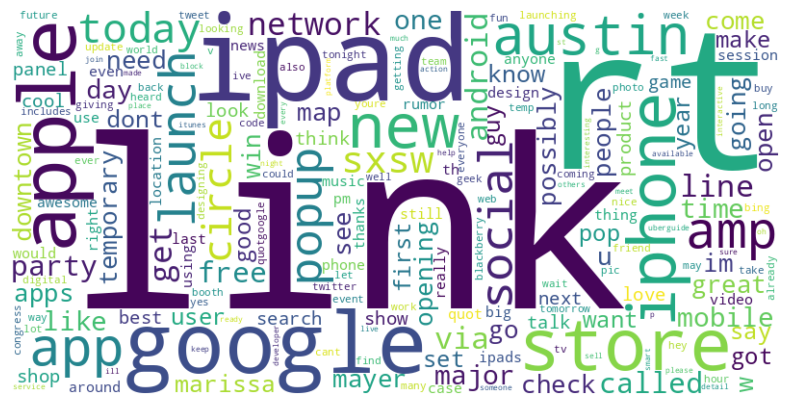

In [21]:
# a word cloud to visualize commonly used words.

from wordcloud import WordCloud
from collections import Counter

# combining all processed text into a single string
all_processed_text = ' '.join(df['processed_text'])

# counting word frequencies
word_freq = Counter(all_processed_text.split())

# creating the word cloud from frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# plotting
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


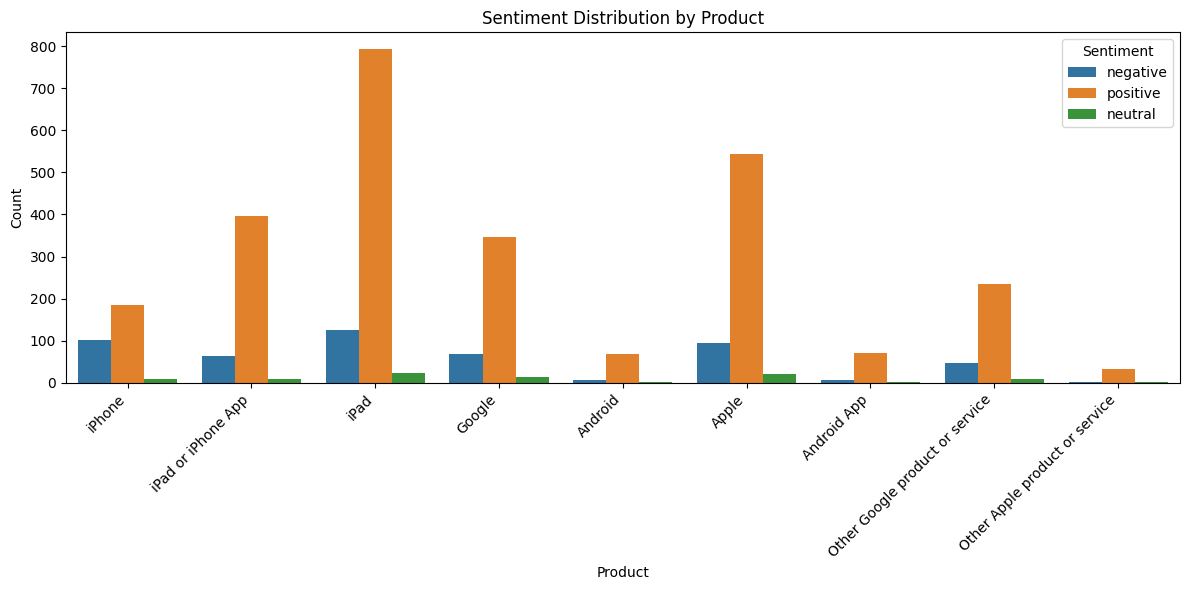

In [22]:
# visualizing how sentiments are distributed across different products.
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='product', hue='sentiment')
plt.xticks(rotation=45, ha='right')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


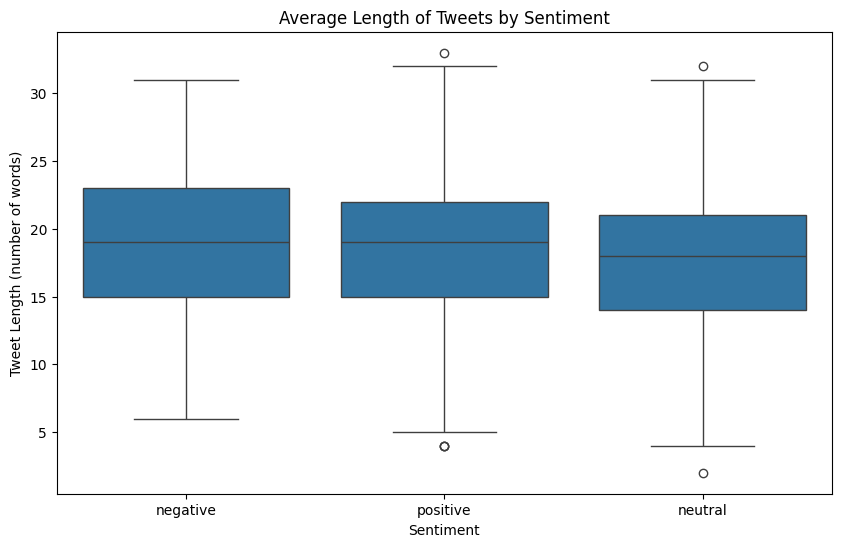

In [23]:
# calculating the length of each tweet and visualizing the average length by sentiment.
df['tweet_length'] = df['tweet'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=df)
plt.title('Average Length of Tweets by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (number of words)')
plt.show()

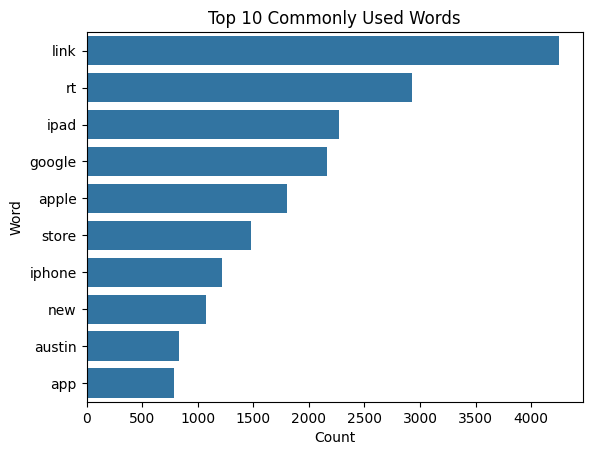

In [24]:
# visualizing the most common tokens
from collections import Counter

all_words = ' '.join(df['processed_text']).split()
word_counts = Counter(all_words)
common_words = word_counts.most_common(10)  # top 10 most common words
# common_words

# creating a DataFrame for better visualization
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])
sns.barplot(x='Count', y='Word', data=common_words_df)
plt.title('Top 10 Commonly Used Words')
plt.show()

In [25]:
#

# Modeling

In [26]:
from sklearn.model_selection import train_test_split

# Assuming 'sentiment' is already mapped to categories: 'positive', 'negative', 'neutral'
y = df['sentiment']
# Split the data into training and testing sets
# You can use a test size of 30% (or adjust if needed)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (7148, 5000)
Test set size: (1788, 5000)


## Baseline Model

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Initialize the Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues arise

# Fit the model on the training data
baseline_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)
# Calculate accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Accuracy:", baseline_accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))


Baseline Model Accuracy: 0.6823266219239373
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.06      0.10       126
     neutral       0.70      0.87      0.78      1094
    positive       0.62      0.45      0.52       568

    accuracy                           0.68      1788
   macro avg       0.63      0.46      0.47      1788
weighted avg       0.67      0.68      0.65      1788

Confusion Matrix:
 [[  7  96  23]
 [  3 955 136]
 [  2 308 258]]


## Logistic Regression Iteration #1

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Define the hyperparameter distribution, including class_weight
param_distributions = {
    'logisticregression__C': [0.01, 0.1, 1, 10],
    'logisticregression__solver': ['liblinear', 'lbfgs'],
    'logisticregression__class_weight': ['balanced', None]  # Adding class_weight to hyperparameters
}

# Create a pipeline with Logistic Regression
pipeline = Pipeline([
    ('logisticregression', LogisticRegression(max_iter=1000))  # Logistic Regression
])

# Initialize Randomized Search
random_search = RandomizedSearchCV(pipeline,
                                   param_distributions,
                                   n_iter=10,  # Number of iterations to sample
                                   cv=5,
                                   random_state=42)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict using the best model
best_model = random_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print("Tuned Model Accuracy:", tuned_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


Best Hyperparameters: {'logisticregression__solver': 'lbfgs', 'logisticregression__class_weight': None, 'logisticregression__C': 1}
Tuned Model Accuracy: 0.6823266219239373
Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.06      0.10       126
     neutral       0.70      0.87      0.78      1094
    positive       0.62      0.45      0.52       568

    accuracy                           0.68      1788
   macro avg       0.63      0.46      0.47      1788
weighted avg       0.67      0.68      0.65      1788

Confusion Matrix:
 [[  7  96  23]
 [  3 955 136]
 [  2 308 258]]


##Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [30]:

# Initialize the Random Forest model with best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=50,               # Best hyperparameter: 50 trees
    min_samples_split=2,           # Minimum samples required to split a node
    min_samples_leaf=2,            # Minimum samples required to be a leaf node
    max_features='sqrt',           # Number of features to consider when looking for the best split
    max_depth=None,                # No maximum depth
    random_state=42,               # Ensure reproducibility
    class_weight='balanced'        # If using class weights to handle imbalanced classes
)

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

# Calculate accuracy
best_rf_accuracy = accuracy_score(y_test, y_pred_best_rf)
print("Best Random Forest Model Accuracy:", best_rf_accuracy)

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))


Best Random Forest Model Accuracy: 0.6431767337807607
Classification Report:
               precision    recall  f1-score   support

    negative       0.34      0.30      0.32       126
     neutral       0.74      0.72      0.73      1094
    positive       0.53      0.57      0.55       568

    accuracy                           0.64      1788
   macro avg       0.54      0.53      0.53      1788
weighted avg       0.65      0.64      0.64      1788

Confusion Matrix:
 [[ 38  51  37]
 [ 51 789 254]
 [ 24 221 323]]
